# 2021S-T1 AISC1001 - Statistical Modelling and Inference 01 (M07 Group 1)

## Application exercise: Linear/Logistic Regression

# Group Members

1. Harikrishna Rajnikant Busa (500195036)
2. Ramandeep Kaur (500190843)
3. Ribhav Saini (500189676)
4. Uttamkumar Tarasariya (500188036)
5. Vishv Maheshkumar Patel (500187545)

#### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#### Loading the diabetes dataset using sklearn

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data
Y = diabetes.target


In [4]:
#  gives the number of rows and columns
X.shape


(442, 10)

In [5]:
Y.shape

(442,)

In [6]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

we are using heat map below to check the co-relation between the features and the target variable

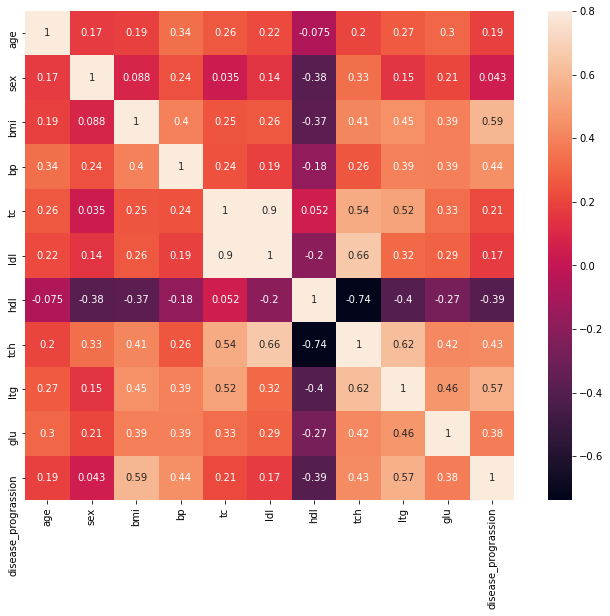

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#### defining the names of columns

In [10]:

df1 = pd.DataFrame(X, columns=["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
print(df1)

          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

#### defining the name of the target column

In [14]:
df2 = pd.DataFrame(Y, columns=["disease_prograssion"])
df2.head(10)

,disease_prograssion
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


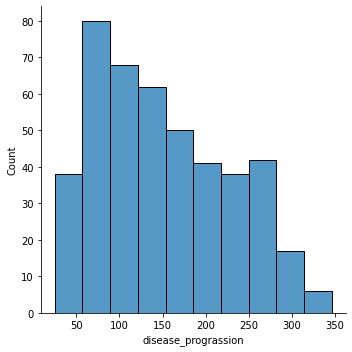

In [17]:
# Generating histogram/distribution plot

sns.displot(df2['disease_prograssion'])

#### merging the data (df1) and target (df2) columns

In [15]:
df = pd.merge(df1,df2, left_index=True, right_index=True)
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_prograssion
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
# It gives all the information regarding the columns like number and data type of columns along with presence of 
# any null value
df.info()

In [ ]:
#  it describes some basic statistical details like percentile, mean, std etc. of a data frame.
df.describe()

In [ ]:
#  it gives whole information about the dataset
print(diabetes.DESCR)

In [ ]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
X_std = standardizer.fit_transform(X)


In [ ]:
diabetes_X = diabetes.data
diabetes_X

In [ ]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]

# Split the targets into training/testing sets
diabetes_Y_train = diabetes.target[:-30]
diabetes_Y_test = diabetes.target[-30:]

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train,diabetes_Y_train)

# Make predictions using the testing set
diabetes_Y_predicted = model.predict(diabetes_X_test)

print ("Mean squared error is: ", mean_squared_error(diabetes_Y_test, diabetes_Y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)
print('Variance score: %.2f' % r2_score(diabetes_Y_test, diabetes_Y_predicted))

#### Plot outputs

In [ ]:
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.scatter(diabetes_X_test, diabetes_Y_predicted)

In [ ]:
# Use all features
diabetes_X = diabetes.data

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]

# Split the targets into training/testing sets
diabetes_Y_train = diabetes.target[:-30]
diabetes_Y_test = diabetes.target[-30:]

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train,diabetes_Y_train)

# Make predictions using the testing set
diabetes_Y_predicted = model.predict(diabetes_X_test)

print ("Mean squared error is: ", mean_squared_error(diabetes_Y_test, diabetes_Y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)
print('Variance score: %.2f' % r2_score(diabetes_Y_test, diabetes_Y_predicted))